In [1]:
import pandas as pd
import numpy as np

# URL corrigée qui pointe directement vers le fichier CSV
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
column_names = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
    'stalk-surface-below-ring', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
    'ring-type', 'spore-print-color', 'population', 'habitat'
]

print("--- ÉTAPE 1 : Chargement des Données ---")
try:
    mushroom_df = pd.read_csv(url, header=None, names=column_names)
    print("✅ Données chargées avec succès.")
    
    # Affichage des premières lignes pour un aperçu rapide
    print("\nAperçu des 5 premières lignes du DataFrame :")
    print(mushroom_df.head())
    
    # Affichage des informations générales sur le DataFrame
    print("\nInformations sur le DataFrame :")
    mushroom_df.info()

except Exception as e:
    print(f"❌ Erreur de chargement des données. Veuillez vérifier l'URL et votre connexion Internet : {e}")
    mushroom_df = pd.DataFrame()

--- ÉTAPE 1 : Chargement des Données ---
✅ Données chargées avec succès.

Aperçu des 5 premières lignes du DataFrame :
  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-co


--- ÉTAPE 2 : Analyse Exploratoire des Données (EDA) ---

Description statistique des données :
                         count unique top  freq
class                     8124      2   e  4208
cap-shape                 8124      6   x  3656
cap-surface               8124      4   y  3244
cap-color                 8124     10   n  2284
bruises                   8124      2   f  4748
odor                      8124      9   n  3528
gill-attachment           8124      2   f  7914
gill-spacing              8124      2   c  6812
gill-size                 8124      2   b  5612
gill-color                8124     12   b  1728
stalk-shape               8124      2   t  4608
stalk-root                8124      5   b  3776
stalk-surface-above-ring  8124      4   s  5176
stalk-surface-below-ring  8124      4   s  4936
stalk-color-above-ring    8124      9   w  4464
stalk-color-below-ring    8124      9   w  4384
veil-type                 8124      1   p  8124
veil-color                8124      4  

C:\Users\defaultuser0\AppData\Local\Temp\ipykernel_1740\1968100533.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='class', data=mushroom_df, palette='viridis')


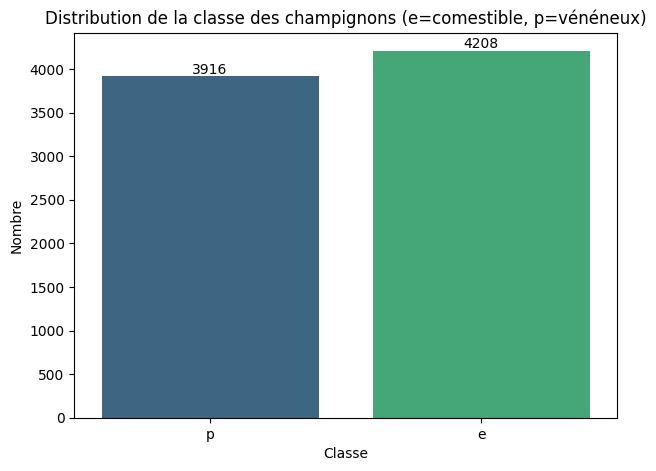

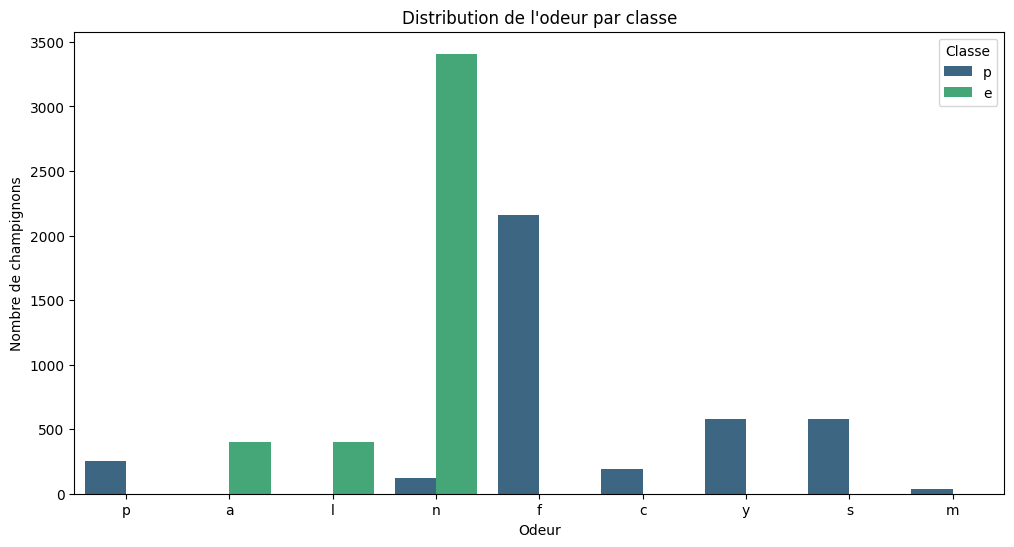

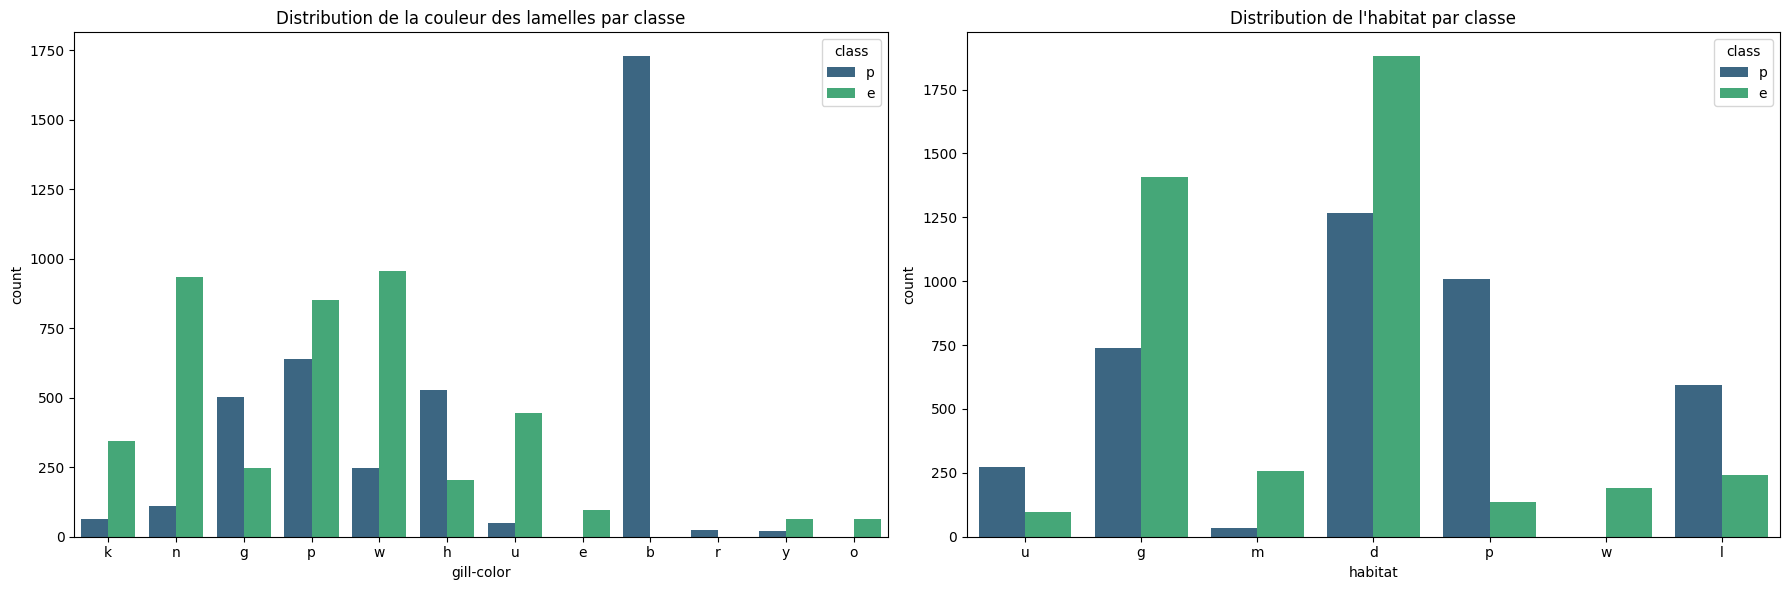

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- ÉTAPE 2 : Analyse Exploratoire des Données (EDA) ---")

if not mushroom_df.empty:
    # 2.1 - Description Statistique
    # Pour un jeu de données catégoriel, la méthode describe() est très utile.
    print("\nDescription statistique des données :")
    print(mushroom_df.describe().T)

    # Vérification des valeurs manquantes ('?')
    # Le document note la présence d'une colonne avec des données manquantes.
    print("\nDétection des valeurs manquantes ('?') :")
    missing_data = mushroom_df[mushroom_df == '?'].count()
    if missing_data.any():
        print(missing_data[missing_data > 0])
    else:
        print("Aucune valeur '?' détectée.")

    # 2.2 - Visualisation des distributions
    
    # Distribution des classes (la variable cible)
    plt.figure(figsize=(7, 5))
    ax = sns.countplot(x='class', data=mushroom_df, palette='viridis')
    plt.title('Distribution de la classe des champignons (e=comestible, p=vénéneux)')
    plt.xlabel('Classe')
    plt.ylabel('Nombre')
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    plt.show()

    # Analyse d'une variable clé, par exemple 'odor' (odeur), en fonction de la classe.
    # L'odeur est souvent un indicateur clé de toxicité.
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(x='odor', hue='class', data=mushroom_df, palette='viridis')
    plt.title("Distribution de l'odeur par classe")
    plt.xlabel("Odeur")
    plt.ylabel("Nombre de champignons")
    plt.legend(title='Classe', loc='upper right')
    plt.show()

    # Visualisation des interactions entre 'class' et d'autres attributs importants
    # Pairplots sont utiles mais peuvent être complexes pour 23 variables.
    # Concentrons-nous sur quelques attributs clés.
    # Par exemple, 'gill-color' et 'habitat' en relation avec la classe.
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    
    sns.countplot(x='gill-color', hue='class', data=mushroom_df, ax=axes[0], palette='viridis')
    axes[0].set_title("Distribution de la couleur des lamelles par classe")
    
    sns.countplot(x='habitat', hue='class', data=mushroom_df, ax=axes[1], palette='viridis')
    axes[1].set_title("Distribution de l'habitat par classe")
    
    plt.tight_layout()
    plt.show()

In [3]:
from sklearn.preprocessing import LabelEncoder

print("\n--- ÉTAPE 3 : Prétraitement des Données pour le ML ---")

if not mushroom_df.empty:
    # Suppression de la colonne 'veil-type' qui a une seule valeur
    print(f"\nSuppression de la colonne 'veil-type' car elle a une valeur constante.")
    mushroom_df.drop('veil-type', axis=1, inplace=True)
    
    # Gérer la colonne 'stalk-root' qui a des valeurs manquantes ('?')
    # Étant une variable catégorielle, nous laissons '?' comme une catégorie à part entière.
    
    # Séparation des caractéristiques (X) et de la cible (y)
    X = mushroom_df.drop('class', axis=1)
    y = mushroom_df['class']

    # Encodage de la variable cible 'class'
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    print("\nValeurs cibles (y) encodées :", y_encoded[:5], " (0=comestible, 1=vénéneux)")

    # Encodage des caractéristiques avec One-Hot Encoding
    X_encoded = pd.get_dummies(X, drop_first=True)
    print("\nAperçu des caractéristiques après One-Hot Encoding :")
    print(X_encoded.head())

    # La suite du code (étape 4 et 5) pour l'entraînement et l'évaluation des modèles
    # peut être ajoutée ici, comme dans la version précédente.
    
    # Exemple de l'étape de séparation des données, qui se trouve à la fin du prétraitement
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)
    print(f"\nDonnées divisées : {len(X_train)} échantillons d'entraînement, {len(X_test)} de test.")


--- ÉTAPE 3 : Prétraitement des Données pour le ML ---

Suppression de la colonne 'veil-type' car elle a une valeur constante.

Valeurs cibles (y) encodées : [1 0 0 1 0]  (0=comestible, 1=vénéneux)

Aperçu des caractéristiques après One-Hot Encoding :
   cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  cap-shape_x  \
0        False        False        False        False         True   
1        False        False        False        False         True   
2        False        False        False        False        False   
3        False        False        False        False         True   
4        False        False        False        False         True   

   cap-surface_g  cap-surface_s  cap-surface_y  cap-color_c  cap-color_e  ...  \
0          False           True          False        False        False  ...   
1          False           True          False        False        False  ...   
2          False           True          False        False        False  ...   
3 

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Supposons que X_encoded, y_encoded, X_train, X_test, y_train, y_test
# sont déjà définis à partir des étapes précédentes.

print("\n--- ÉTAPE 4 : Entraînement et Comparaison des Modèles ---")

# Initialisation des modèles
models = {
    'Régression Logistique': LogisticRegression(random_state=42, max_iter=500),
    'Forêt Aléatoire': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'k-NN': KNeighborsClassifier()
}

results = {}

# Boucle pour entraîner et évaluer chaque modèle
for name, model in models.items():
    print(f"\nEntraînement du modèle : {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Évaluation des performances avec les métriques suggérées 
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=0)
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        'accuracy': accuracy,
        'report': report,
        'confusion_matrix': cm
    }

    print(f"✅ Modèle {name} entraîné avec succès.")
    print(f"Précision sur l'ensemble de test : {accuracy:.4f}")

# Création d'un tableau récapitulatif des performances
print("\n--- Récapitulatif des performances des modèles ---")
performance_summary = pd.DataFrame([
    {'Modèle': name, 'Précision': res['accuracy']} for name, res in results.items()
]).sort_values(by='Précision', ascending=False)

print(performance_summary)


--- ÉTAPE 4 : Entraînement et Comparaison des Modèles ---

Entraînement du modèle : Régression Logistique...
✅ Modèle Régression Logistique entraîné avec succès.
Précision sur l'ensemble de test : 1.0000

Entraînement du modèle : Forêt Aléatoire...
✅ Modèle Forêt Aléatoire entraîné avec succès.
Précision sur l'ensemble de test : 1.0000

Entraînement du modèle : Gradient Boosting...
✅ Modèle Gradient Boosting entraîné avec succès.
Précision sur l'ensemble de test : 1.0000

Entraînement du modèle : k-NN...
✅ Modèle k-NN entraîné avec succès.
Précision sur l'ensemble de test : 1.0000

--- Récapitulatif des performances des modèles ---
                  Modèle  Précision
0  Régression Logistique        1.0
1        Forêt Aléatoire        1.0
2      Gradient Boosting        1.0
3                   k-NN        1.0



--- ÉTAPE 5 : Analyse des Résultats ---

Le meilleur modèle est : Régression Logistique avec une précision de 1.0000
Rapport de classification détaillé pour Régression Logistique:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



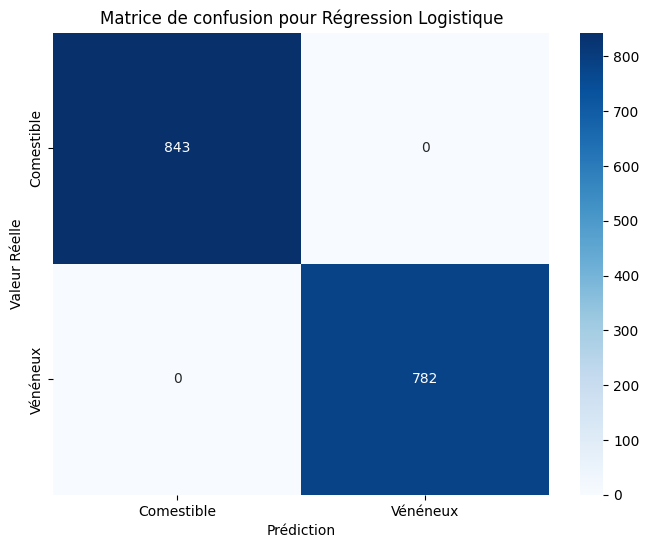


Conclusion :
La matrice de confusion nous montre le nombre de vrais positifs, de faux positifs,
de vrais négatifs et de faux négatifs. Cela nous aide à comprendre les types d'erreurs
commises par le modèle, ce qui est crucial pour des applications réelles.


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- ÉTAPE 5 : Analyse des Résultats ---")

# Trouvez le modèle avec la meilleure précision
best_model_name = performance_summary.iloc[0]['Modèle']
best_model_results = results[best_model_name]

print(f"\nLe meilleur modèle est : {best_model_name} avec une précision de {best_model_results['accuracy']:.4f}")
print(f"Rapport de classification détaillé pour {best_model_name}:\n{best_model_results['report']}")

# Visualisation de la matrice de confusion pour le meilleur modèle
plt.figure(figsize=(8, 6))
sns.heatmap(best_model_results['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
            xticklabels=['Comestible', 'Vénéneux'], yticklabels=['Comestible', 'Vénéneux'])
plt.title(f'Matrice de confusion pour {best_model_name}')
plt.xlabel('Prédiction')
plt.ylabel('Valeur Réelle')
plt.show()

# Conclusion
print("\nConclusion :")
print("La matrice de confusion nous montre le nombre de vrais positifs, de faux positifs,")
print("de vrais négatifs et de faux négatifs. Cela nous aide à comprendre les types d'erreurs")
print("commises par le modèle, ce qui est crucial pour des applications réelles.")